In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
print("number of rows",data.shape[0])
print("number of columns",data.shape[1])

number of rows 284807
number of columns 31


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
not_fraud=data[data.Class==0]
fraud=data[data.Class==1]
print(not_fraud.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [7]:
not_fraud.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [8]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [9]:
data.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [10]:
ss=StandardScaler()
data["Amount"]=ss.fit_transform(pd.DataFrame(data["Amount"]))
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [11]:
data=data.drop(['Time'],axis=1)

In [12]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [13]:
data.shape

(284807, 30)

In [14]:
data.duplicated().any()


True

In [15]:
data=data.drop_duplicates()

In [16]:
data.shape

(275663, 30)

In [17]:
284807-275663

9144

we have 9144 of duplicte transaction data, and it is removed.

In [18]:
data['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

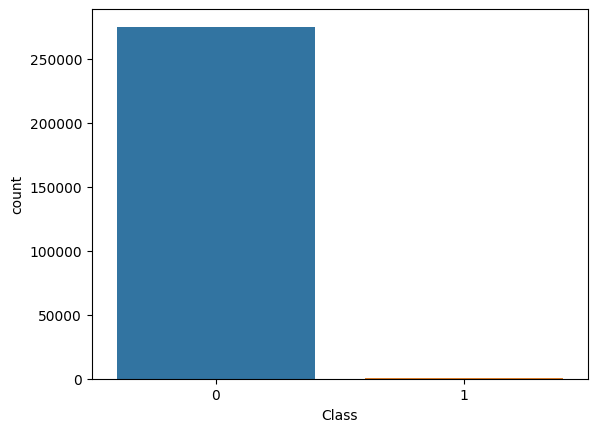

In [19]:
sns.countplot(data,x="Class")

**UnderSampling**

In [20]:
normal=data[data['Class']==0]
fraud=data[data['Class']==1]

In [21]:
fraud.shape

(473, 30)

In [22]:
normal.shape

(275190, 30)

In [23]:
n_sample=normal.sample(n=473)

In [24]:
n_sample.shape

(473, 30)

In [25]:
new_data=pd.concat([n_sample,fraud],ignore_index=True)

In [26]:
new_data['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [27]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.505039,0.815512,1.623388,0.724064,0.272064,0.160711,0.696094,0.176247,-0.631658,-0.429535,...,0.059606,0.308605,-0.157185,0.232918,0.161215,-0.385152,0.083165,0.050476,-0.254037,0
1,1.146109,-0.435605,-0.993457,-0.283854,1.810242,3.634833,-0.608188,0.889243,0.401020,-0.178594,...,-0.311365,-1.039049,-0.017978,1.021875,0.469180,0.188932,-0.026298,0.022090,-0.053413,0
2,-0.758225,-0.521122,2.186803,-2.674250,-0.952751,0.406505,-0.860410,0.551496,-2.100293,0.989470,...,0.025978,0.434005,-0.218896,-0.366773,0.169615,-0.120300,0.326469,0.108600,-0.335638,0
3,1.149375,0.134274,0.519458,1.478688,-0.420134,-0.399674,-0.020974,0.040735,0.470489,-0.084058,...,-0.098367,-0.103036,-0.001856,0.384350,0.576376,-0.328076,0.032441,0.015720,-0.337277,0
4,-0.754221,1.143086,2.222409,1.376102,0.911780,1.358942,0.292109,0.428625,-1.531595,0.179437,...,-0.003219,-0.091358,-0.328463,-1.163352,0.199220,-0.033079,0.072760,0.062351,-0.337477,0


In [28]:
x=new_data.drop("Class",axis=1)
y=new_data['Class']

In [29]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)

**Logistic Regression**

In [30]:
from sklearn.linear_model import LogisticRegression
l=LogisticRegression()
l.fit(xtrain,ytrain)

LogisticRegression()

In [31]:
l_pred=l.predict(xtest)
print(l_pred)

[1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0
 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1
 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1
 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1
 1 1 1 0 0]


In [32]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [33]:
accuracy_score(ytest,l_pred)

0.9368421052631579

In [34]:
recall_score(ytest,l_pred)

0.9117647058823529

In [35]:
precision_score(ytest,l_pred)

0.96875

In [36]:
f1_score(ytest,l_pred)

0.9393939393939394

**Decision Tree Classifier** 

In [37]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
d.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [38]:
d_pre=d.predict(xtest)

In [39]:
accuracy_score(ytest,d_pre)

0.9421052631578948

In [40]:
precision_score(ytest,d_pre)

0.941747572815534

In [41]:
recall_score(ytest,d_pre)

0.9509803921568627

In [42]:
f1_score(ytest,d_pre)

0.9463414634146341

**Random Forest Classifier**

In [43]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()
r.fit(xtrain,ytrain)

RandomForestClassifier()

In [44]:
r_pred=r.predict(xtest)

In [45]:
accuracy_score(ytest,r_pred)

0.9315789473684211

In [46]:
precision_score(ytest,r_pred)

0.968421052631579

In [47]:
recall_score(ytest,r_pred)

0.9019607843137255

In [48]:
f1_score(ytest,r_pred)

0.934010152284264

In [49]:
f_data=pd.DataFrame({"model":["logi Regeression",'Deci Tree','Ran Forest'],"accuracy":[accuracy_score(ytest,l_pred)*100,accuracy_score(ytest,d_pre)*100,
                                                                                accuracy_score(ytest,r_pred)*100]})

In [50]:
f_data

,model,accuracy
0,logi Regeression,93.684211
1,Deci Tree,94.210526
2,Ran Forest,93.157895


<AxesSubplot:xlabel='model', ylabel='accuracy'>

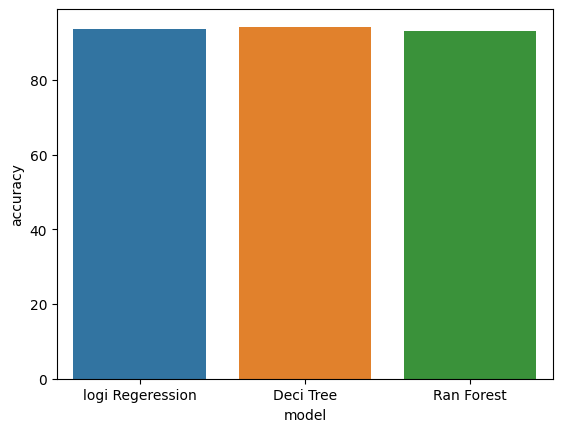

In [51]:
sns.barplot(x="model",y="accuracy",data=f_data)

In [52]:
res=LogisticRegression()
res.fit(x,y)

LogisticRegression()

In [53]:
import joblib

In [54]:
joblib.dump(res,"credit_card_model")

['credit_card_model']

In [55]:
m=joblib.load("credit_card_model")

In [56]:
val=m.predict([[100,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,12]])
if val==0:
  print("Normal Transaction")
else:
  print("Fradulant Transaction")

Fradulant Transaction


C:\Users\Somnadh\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
